IMPORT RAW DATA

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving RAW DATA1.xlsx to RAW DATA1 (1).xlsx


LOAD DATA


In [ ]:
# Step 1: Import Libraries
import pandas as pd

# Step 2: Load Your Dataset
file_path = "/content/RAW DATA1.xlsx"
df = pd.read_excel(file_path)


# Step 3: Drop Unwanted Columns
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Step 4: Handle Missing Values
print("Missing values before:\n", df.isnull().sum())
df = df.dropna()  # OR use df.fillna(method='ffill') if preferred

# Step 5: Clean Column Names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Step 6: Convert Date Columns
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 7: Create New Features
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']
df['GST_Amount'] = df['Total_Spend'] * df['GST']
df['Final_Amount'] = df['Total_Spend'] + df['GST_Amount'] + df['Delivery_Charges']

# Step 8: Format and Cast Data Types
df['Month'] = df['Month'].astype(int)
df['Discount_pct'] = df['Discount_pct'].astype(float)
df['Coupon_Status'] = df['Coupon_Status'].astype(str)

# Step 9: Remove Duplicates
df.drop_duplicates(inplace=True)

# Step 10: Preview Cleaned Data
df.head()


Missing values before:
 CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Total_Spend,GST_Amount,Final_Amount
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0,6924.5,692.45,7623.45
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0,6924.5,692.45,7623.45
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0,6924.5,692.45,7623.45
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0,6924.5,692.45,7623.45
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0,6924.5,692.45,7623.45


CLEANED DATA

In [ ]:
df.to_csv("cleaned_online_shopping.csv", index=False)


DOWNLOAD DATA


In [ ]:
from google.colab import files
files.download("cleaned_online_shopping.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AFTER CLEANING, UPLOADED THE FILE

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_online_shopping.csv to cleaned_online_shopping (2).csv


IMPORT THE FILE

In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_online_shopping.csv")


EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned CSV (assuming it's already uploaded)
df = pd.read_csv("cleaned_online_shopping.csv")

# --- Parse the 'Transaction_Date' column correctly ---
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], dayfirst=True, errors='coerce')

# Optional: Seaborn style
sns.set(style="whitegrid")




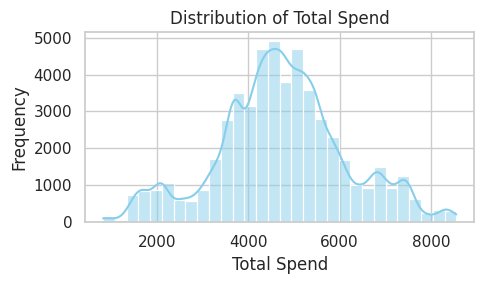

In [ ]:
# --- 1. Distribution of Total Spend ---
plt.figure(figsize=(5, 3))
sns.histplot(df['Total_Spend'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/tmp/ipython-input-22-3056295805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_spend, x='Month', y='Total_Spend', palette='viridis')


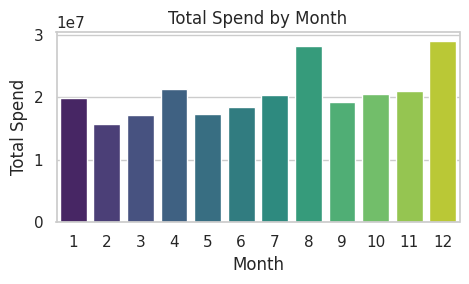

In [ ]:
# --- 2. Monthly Spend (Bar Plot) ---
monthly_spend = df.groupby('Month')['Total_Spend'].sum().reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=monthly_spend, x='Month', y='Total_Spend', palette='viridis')
plt.title('Total Spend by Month')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-4108244614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Coupon_Status', palette='Set2')


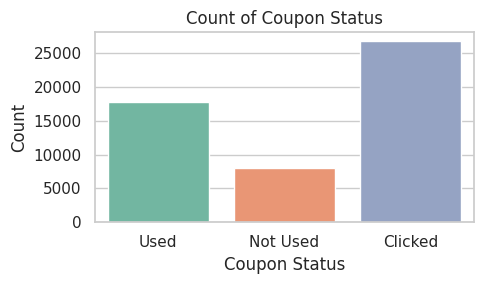

In [ ]:
# --- 3. Coupon Status Count ---
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Coupon_Status', palette='Set2')
plt.title('Count of Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-24-2867319580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spend_df, x='Spend_Type', y='Amount', palette='pastel')


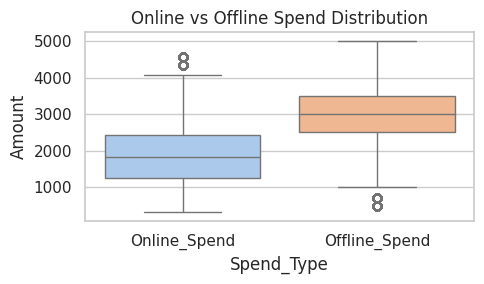

In [ ]:
# --- 4. Online vs Offline Spend (Box Plot) ---
spend_df = df[['Online_Spend', 'Offline_Spend']].melt(var_name='Spend_Type', value_name='Amount')
plt.figure(figsize=(5, 3))
sns.boxplot(data=spend_df, x='Spend_Type', y='Amount', palette='pastel')
plt.title('Online vs Offline Spend Distribution')
plt.tight_layout()
plt.show()

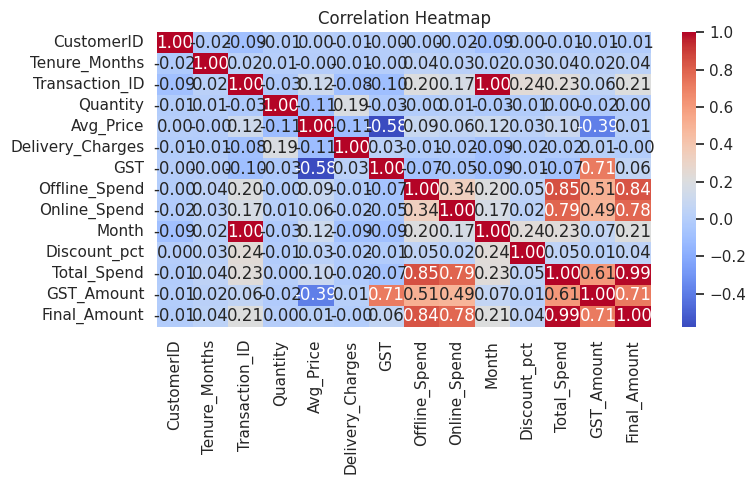

In [ ]:
# --- 5. Correlation Heatmap ---
plt.figure(figsize=(8, 5))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

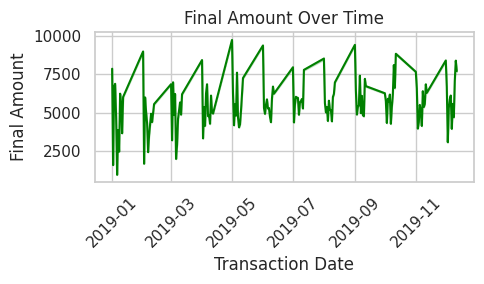

In [ ]:
# --- 6. Final Amount Over Time (Line Plot) ---
df_sorted = df.sort_values('Transaction_Date')
plt.figure(figsize=(5, 3))
sns.lineplot(data=df_sorted, x='Transaction_Date', y='Final_Amount', color='green')
plt.title('Final Amount Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Final Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# --- Check parsed dates ---
print(df['Transaction_Date'].head())
print(df['Transaction_Date'].dtype)

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: Transaction_Date, dtype: datetime64[ns]
datetime64[ns]


In [ ]:
# Label Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot Encode Product Category if needed
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)

df.head()


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Quantity,Avg_Price,...,Product_Category_Gift Cards,Product_Category_Headgear,Product_Category_Housewares,Product_Category_Lifestyle,Product_Category_Nest,Product_Category_Nest-Canada,Product_Category_Nest-USA,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze
0,17850.0,NaN,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,...,False,False,False,False,False,False,True,False,False,False
1,17850.0,NaN,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,...,False,False,False,False,False,False,True,False,False,False
2,17850.0,NaN,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,2.0,122.77,...,False,False,False,False,False,False,True,False,False,False
3,17850.0,NaN,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,1.0,81.50,...,False,False,False,False,False,False,True,False,False,False
4,17850.0,NaN,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1.0,153.71,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
target_column = 'Final_Amount'  # Replace with your actual target column name

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (52524, 36)
y shape: (52524,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Drop any ID columns (optional)
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# Label encode binary columns (like Gender)
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# One-hot encode all remaining object (string) columns
df = pd.get_dummies(df, drop_first=True)

# Confirm all columns are now numeric
print(df.dtypes[df.dtypes == 'object'])  # This should print empty


Series([], dtype: object)


In [ ]:
# Define the target column
target_column = 'Final_Amount'  # Replace with your actual column name

# Define X and y
X = df.drop(target_column, axis=1)
y = df[target_column]


----

In [ ]:
import pandas as pd

# Load your cleaned CSV
df = pd.read_csv('/content/cleaned_online_shopping.csv')

# Clean column names
df.columns = df.columns.str.strip()


In [ ]:
# Convert date columns
if 'Transaction_Date' in df.columns:
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop date columns (machine learning models can't handle datetime directly)
df = df.drop(columns=['Transaction_Date', 'Date'], errors='ignore')

# Label encode Gender
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Drop any customer ID or irrelevant ID column
df = df.drop(columns=['CustomerID'], errors='ignore')

# One-hot encode all object (categorical) columns
df = pd.get_dummies(df, drop_first=True)


In [ ]:
target_column = 'Final_Amount'

X = df.drop(target_column, axis=1)
y = df[target_column]

# Confirm X contains only numeric data
print("Non-numeric columns:", X.select_dtypes(include=['object']).columns.tolist())


Non-numeric columns: []


In [ ]:
print(X_train.dtypes)


CustomerID                                      float64
Gender                                          float64
Location                                         object
Tenure_Months                                   float64
Transaction_ID                                  float64
Transaction_Date                         datetime64[ns]
Product_SKU                                      object
Product_Description                              object
Quantity                                        float64
Avg_Price                                       float64
Delivery_Charges                                float64
Coupon_Status                                    object
GST                                             float64
Date                                             object
Offline_Spend                                   float64
Online_Spend                                    float64
Month                                             int64
Coupon_Code                                     

In [ ]:
# Convert boolean columns to integers (0 and 1)
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})


In [ ]:
# Step 1: Drop target and convert bools to int
target_column = 'Final_Amount'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert boolean columns to integer (True/False → 1/0)
X = X.astype({col: int for col in X.select_dtypes(include='bool').columns})

# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Optimized Random Forest (smaller, faster model)
model = RandomForestRegressor(
    n_estimators=50,     # Use 50 trees instead of 100
    max_depth=10,        # Limit tree depth
    random_state=42,
    n_jobs=-1            # Use all CPU cores
)

model.fit(X_train, y_train)


# Step 4: Predict and evaluate performance
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Evaluation metrics
print("✅ R² Score:", r2_score(y_test, y_pred))

# Use manual square root to avoid error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("✅ RMSE:", rmse)


✅ R² Score: 0.9999117825213563
✅ RMSE: 15.354904400979429


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/tmp/ipython-input-118-2113725016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature', palette='viridis')


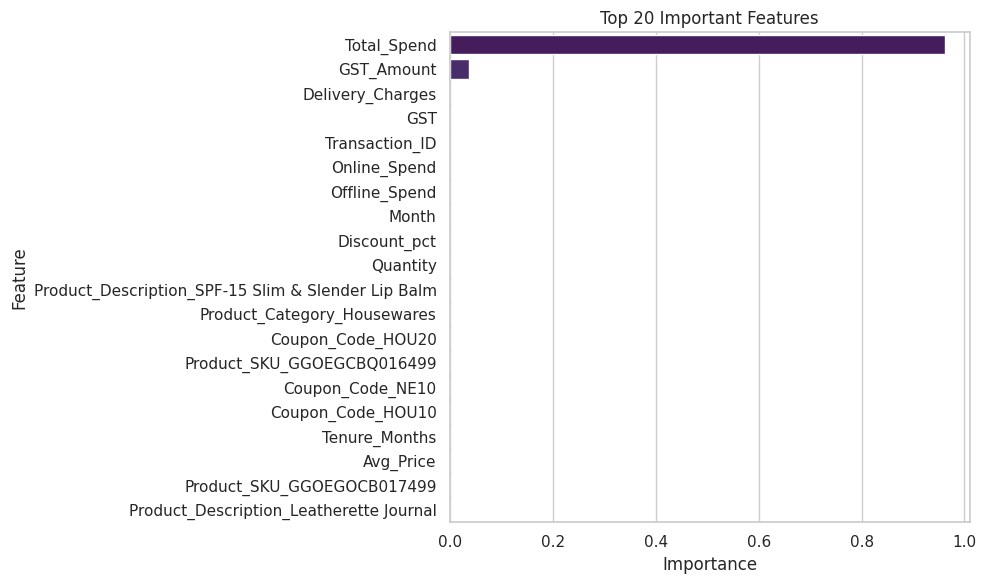

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame of feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()


In [ ]:
results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred

results.to_csv("model_results_for_powerbi.csv", index=False)

# Download in Colab
from google.colab import files
files.download("model_results_for_powerbi.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>